In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data




In [2]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


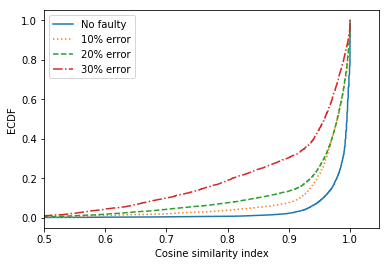

In [15]:
data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10 = read_clients("faulty/10%/sim")
data20 = read_clients("faulty/20%/sim1")
data30 = read_clients("faulty/30%/sim")
styles=['-', ':', '--','-.']

#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10).plot(style=styles[1])
getECDF(data20).plot(style=styles[2])
getECDF(data30).plot(style=styles[3])

plt.legend(['No faulty', '10% error', '20% error', '30% error'])
plt.xlim(0.5)
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.show()

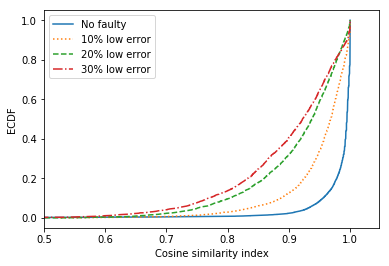

In [16]:
data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10l = read_clients("faulty/10_low/sim")
data20l = read_clients("faulty/20_low/sim")
data30l = read_clients("faulty/30_low/sim")

styles=['-', ':', '--','-.']
#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10l).plot(style=styles[1])
getECDF(data20l).plot(style=styles[2])
getECDF(data30l).plot(style=styles[3])

plt.legend(['No faulty', '10% low error', '20% low error', '30% low error'])
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.xlim(0.5)

plt.show()

In [34]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway','latency','actual_latency','sender']

#Read input files from the directory and returns DataTable object in a combined list
def read_gw_table(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        
        client_data['time'] = pd.to_datetime(client_data['time'])
        #client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data)
    return data


In [38]:
data = read_gw_table("cpu_bw/cpu_var/gw_table")
print(data.groupby['time','gateway'])

TypeError: 'method' object is not subscriptable